# Data Science Project based on E_Commerce_and_Customers_dataset

              ** #  Details of the Data Scientist**
Names         : Xilaveko Sheldon Baloyi <br>
Qualification : BSc Mathematical Sciences (Computer Sciences & Statistics)<br>
Phone number  :072 290 3669 <br>
Email         :xilavekovuako@gmail.com <br>
Date          : 29 December 2024 <br>

E-COMMERCE SALES AND CUSTOMER PROJECT

problem:
-to understand customers behaviour, sales trends and logistical effect of the sales of the business sales 


AIM:
-I want to study the customer's behavour , sales trend 
-and relationship between product name and age  also total price
-therefore the last one is to forecast future sales based of the past data

IMPORTING NECESSARY LIBRARIES


In [1]:
#starting to import my libraries for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

IS TIME TO LOAD AND VIEW MY DATASET SO THAT I CAN START MY ANALYSIS
- here is what is needed:

    ->i need the library called pandas to load my dataset , data cleaning and many more 

In [2]:
data=pd.read_csv(r'D:\School Documents\data science\E_Commerce Sale\realistic_e_commerce_sales_data.csv')
data.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


DATA PREPROCESSING(*CLEANING AND MANIPULATION*):

it is observed from my dataset that there are missing values 

    ->i have to fix and clean my dataset so that i can carry on with my analysis
    
    ->and it need some filtering , sorting and grouping 

In [3]:
data.isnull().sum()

Customer ID          0
Gender               0
Region              50
Age                100
Product Name         0
Category             0
Unit Price           0
Quantity             0
Total Price          0
Shipping Fee         0
Shipping Status     50
Order Date           0
dtype: int64

Interprentations:

-it is found that the are null value or missing observations in my data
solutions:
-remove it from the dataset
-replace the missing data with a minimum years to make a purchase which is 18 years old

In [4]:
data['Age']=data['Age'].fillna('18')
data=data.dropna(axis=0)
data.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,18,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,18,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [5]:
data.duplicated().sum()
data.dtypes

Customer ID         object
Gender              object
Region              object
Age                 object
Product Name        object
Category            object
Unit Price         float64
Quantity             int64
Total Price          int64
Shipping Fee       float64
Shipping Status     object
Order Date          object
dtype: object

In [6]:
if 'Age' in data.columns:
    data['Age']= data['Age'].astype(int)

if 'Order Date' in data.columns:
    data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

data.dtypes

Customer ID                object
Gender                     object
Region                     object
Age                         int32
Product Name               object
Category                   object
Unit Price                float64
Quantity                    int64
Total Price                 int64
Shipping Fee              float64
Shipping Status            object
Order Date         datetime64[ns]
dtype: object

In [7]:
data['Shipping Status'].unique()

array(['Returned', 'In Transit', 'Delivered'], dtype=object)

In [8]:
data=data.drop(['Customer ID'], axis=1)

data.head()

,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,Male,North,18,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,Male,West,22,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,Female,South,54,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,Male,North,23,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,Female,South,18,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


## Data cleaning  report.

    1. Data is in the correct format
    2. about 190 Rows containing mising data were removed
    3. Customer ID is removed since it is not important for this analysis
    
    All the issues are resolved.

DATA VISUALISATION:

-i decided to do visualisation to understand my data before going deep in machine learning and models

    -> plots like Histogram , bar-plot , time series plot and scatter plot  will be used in my visualisations

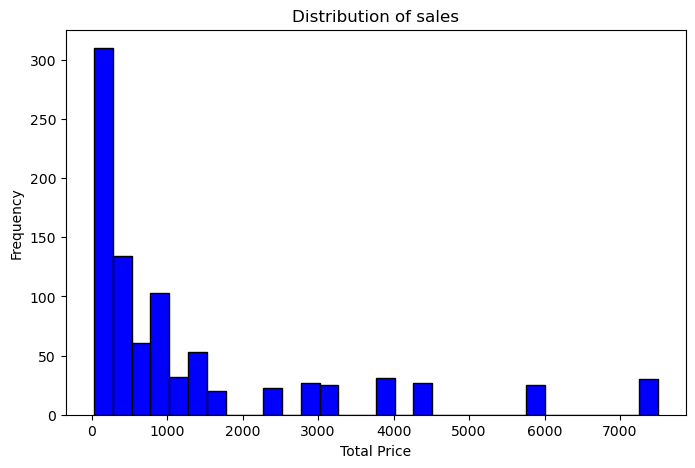

C:\Users\xilav\AppData\Local\Temp\ipykernel_8584\3484390022.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='pastel')


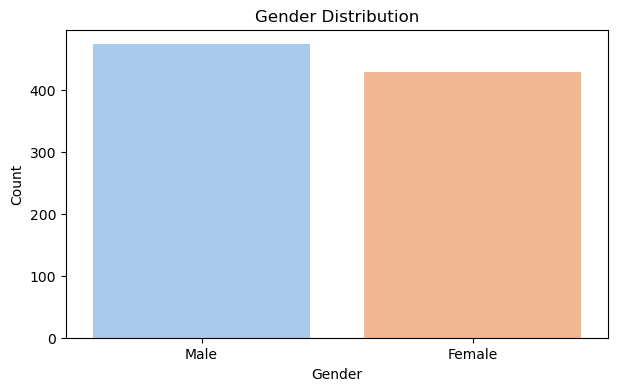

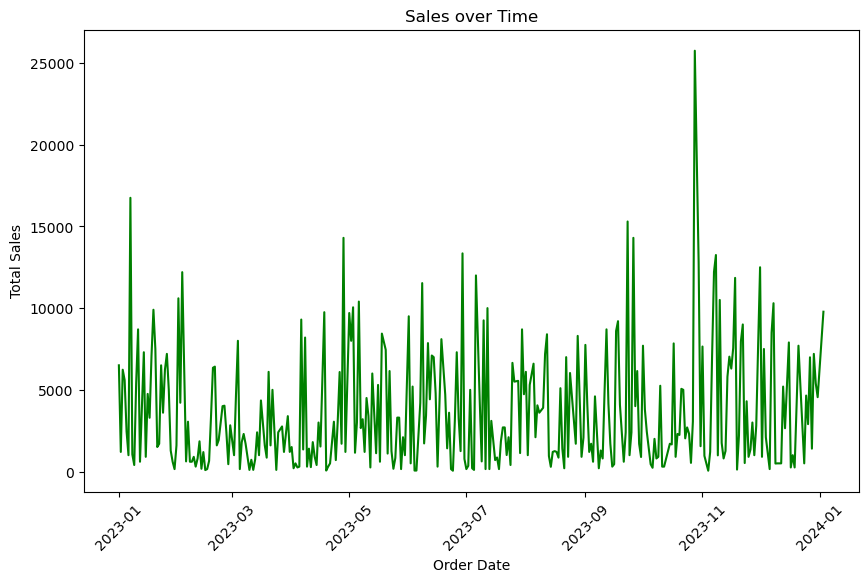

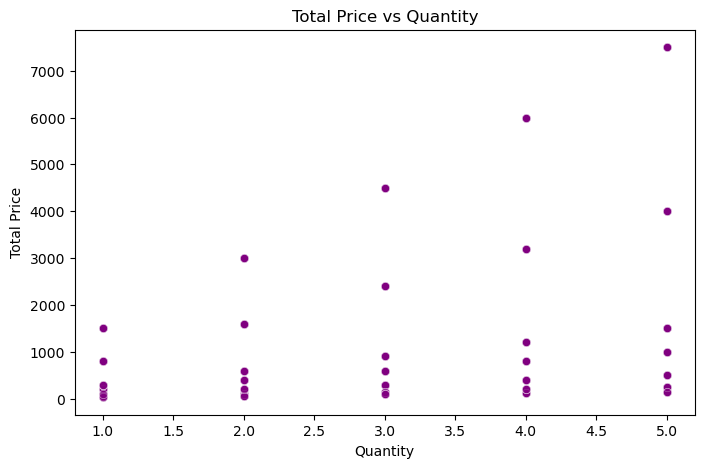

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#histograms plotting
plt.figure(figsize=(8, 5))
plt.hist(data['Total Price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of sales')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

#bar-chart plotting
plt.figure(figsize=(7, 4))
sns.countplot(data=data, x='Gender', palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#Time series plot of sales
data['Order Date'] = pd.to_datetime(data['Order Date'])
sales_over_time = data.groupby('Order Date')['Total Price'].sum()
###########################################################################
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time.index, sales_over_time.values, color='green')
plt.title("Sales over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

#Scatter plot for relationship
plt.figure(figsize=(8 , 5))
sns.scatterplot(data=data, x='Quantity', y='Total Price', alpha=0.6, color='purple')
plt.title("Total Price vs Quantity")
plt.xlabel("Quantity")
plt.ylabel("Total Price")
plt.show()



Analysis

    ->Right-Skewed Distribution: The majority of sales are concentrated in the lower price range which is below 1000, with a sharp decline in frequency as sales amounts increase.
    ->Outliers: A few sales values exceed 4000, representing high-value transactions that occur infrequently.

Time Series Plot
    -> The actual sales data exhibits significant variability, with frequent spikes and drops. Notable peaks are observed in September and November 2023, which may indicate seasonality or special events.

MACHINE LEARNING MODELING:

->Start by training and testing my model based on the dataset im having

-my desired model will be based in time series,regression and random forest

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Features= ['Region', 'Category', 'Unit Price', 'Quantity', 'Shipping Fee', 'Age', 'Product Name']
Target='Total Price'

x = data[Features]
y = data[Target]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

print(f"size train : x: {x_train.shape} => y: {y_train.shape}")
print(f"size test : x: {x_test.shape} => y: {y_test.shape}")

print("x_train shape: ", x_train.shape)
print("y_train: ", y_train.shape)

print(x_train.dtypes)
print(y_train.isnull().sum())
print(data.columns)

size train : x: (630, 7) => y: (630,)
size test : x: (271, 7) => y: (271,)
x_train shape:  (630, 7)
y_train:  (630,)
Region           object
Category         object
Unit Price      float64
Quantity          int64
Shipping Fee    float64
Age               int32
Product Name     object
dtype: object
0
Index(['Gender', 'Region', 'Age', 'Product Name', 'Category', 'Unit Price',
       'Quantity', 'Total Price', 'Shipping Fee', 'Shipping Status',
       'Order Date'],
      dtype='object')


**Training Data (x_train, y_train)**

    Size:
        -->Features (x_train): (630, 7)
            This means there are 630 samples (observations) and 7 features (predictors) in the training set.
        -->Target (y_train): (630,)
            There are 630 corresponding target values, one for each sample.

    Purpose:
        ->The training data is used to train the model, where the model learns the relationship between the features (x_train) and the target (y_train).
        ->The goal is for the model to generalize well on unseen data by minimizing errors during training.

**Testing Data (x_test, y_test)**

    Size:
        -->Features (x_test): (271, 7)
            The test set contains 271 samples and the same 7 features as the training set.
        -->Target (y_test): (271,)
            There are 271 target values corresponding to the test features.

    Purpose:
        ->The test data is used to evaluate the model's performance. It provides an estimate of how well the model generalizes to new, unseen data.
        ->The test set must remain independent of the training process to avoid overfitting.

MODELLING MY DATA

Linear Regression R^2:  0.8460474733895595
Random Forest R^2:  0.9999620689492434
Linear Regression MSE:  453057.4868684187
Random Forest MSE:  111.62497237569062
                      Feature    Importance
1                  Unit Price  7.371926e-01
2                    Quantity  2.624549e-01
8  Shipping Status_In Transit  1.627760e-04
3                Shipping Fee  1.077216e-04
0                         Age  7.335378e-05
4                 Gender_Male  7.658187e-06
7                 Region_West  9.794436e-07
5                Region_North  0.000000e+00
6                Region_South  0.000000e+00
9    Shipping Status_Returned  0.000000e+00
Most influential feature: 
Feature       Unit Price
Importance      0.737193
Name: 1, dtype: object


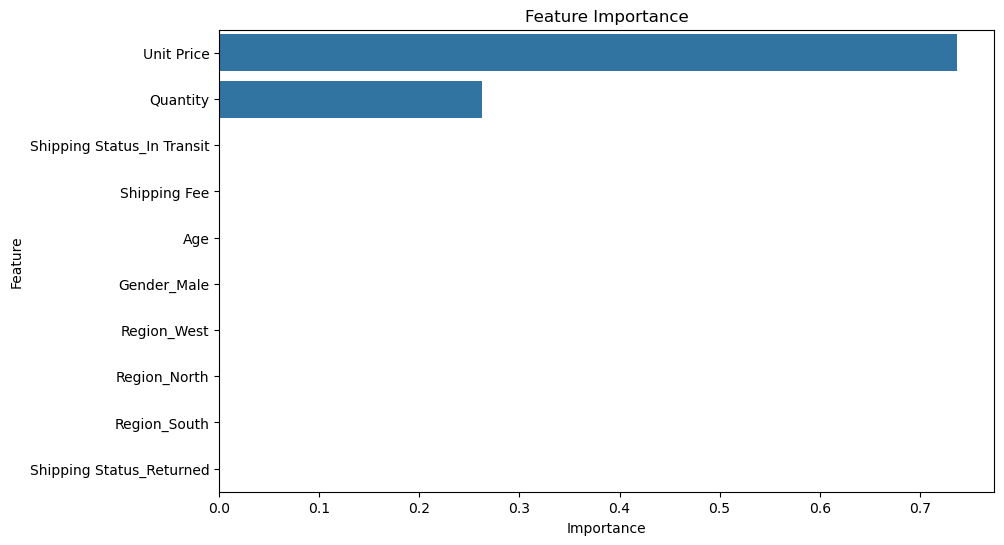

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

x = data.drop(columns=["Total Price","Order Date", "Category", "Product Name"])
y = data["Total Price"]

x = pd.get_dummies(x, drop_first=True)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#Fitting my models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)

lin_reg.fit(x_train, y_train)
rf_reg.fit(x_train, y_train)

#Predictions
y_pred_lin = lin_reg.predict(x_test)
y_pred_rf = rf_reg.predict(x_test)


#Metrics
print("Linear Regression R^2: ", r2_score(y_test, y_pred_lin))
print("Random Forest R^2: ", r2_score(y_test, y_pred_rf))
print("Linear Regression MSE: ", mean_squared_error(y_test, y_pred_lin))
print("Random Forest MSE: ", mean_squared_error(y_test, y_pred_rf))

importances = rf_reg.feature_importances_
Features_names = x.columns
feature_importance_df = pd.DataFrame({"Feature": Features_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
print(feature_importance_df)
print("Most influential feature: ")
print(feature_importance_df.iloc[0])

#Visualizations of importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

ANALYSIS FOR Above Analysis and model

1.Linear Regression:
Coefficient of determination(R^2):
    ->84% of the varience in total price is explained by the input features in the model.
    ->this is good fit and it shows that there's a room for improvement
Mean Squared Error(MSE):
    ->The average squared difference between the predicted and actual values of TOTAL PRICE. this shows that the model was struggling with capturing certain complex patterns in the data.

2.Random Forest:
R^2:
    ->The model fits the training data extremely well and generalizes better compared to linear Regression
Mean Squared Error:
    ->The model's predictions are highly accurate with minimal errors.

3.Influential Column to Total Price:
    ->Unit price is most influential column to the total price 

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 100}


In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Order Date'])
print(f"ADF Statistics: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("The series is not stationary. Differencing will be applied.")
else:
    print("The series is stationary...")


ADF Statistics: -0.2205357343786231
p-value: 0.9360291328657881
The series is not stationary. Differencing will be applied.


In [14]:
data['Order Date_diff']= data['Order Date'].diff().dropna()

result = adfuller(data['Order Date_diff'].dropna())
print(f"ADF Statistics: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("The series is not stationary. Differencing will be applied.")
else:
    print("The series is stationary...")

ADF Statistics: -11.200614382904702
p-value: 2.2487658404580707e-20
The series is stationary...


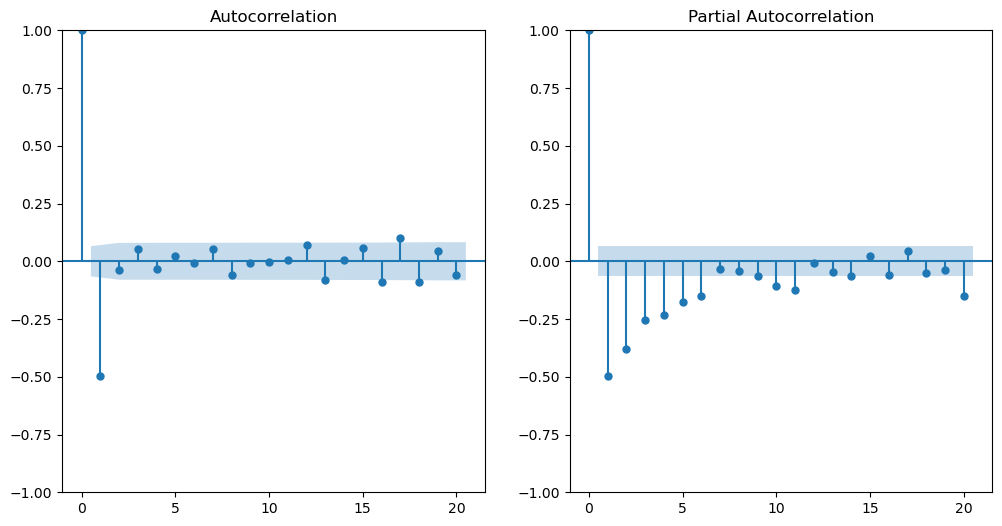

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Order Date_diff'].dropna(), ax=plt.gca(), lags=20)
plt.subplot(122)
plot_pacf(data['Order Date_diff'].dropna(), ax=plt.gca(), lags=20)
plt.show()

In [16]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Drop rows with invalid or missing dates
data = data.dropna(subset=['Order Date'])

# Set 'Order Date' as the index
data.set_index('Order Date', inplace=True)

# Sort the index to ensure it's in chronological order
data = data.sort_index()

# Resample the data to daily frequency and sum the 'Total Price'
daily_data = data['Total Price'].resample('D').sum()

print(daily_data.head())


Order Date
2023-01-01    6500
2023-01-02    1200
2023-01-03    6230
2023-01-04    5600
2023-01-05    2460
Freq: D, Name: Total Price, dtype: int64


In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Total Price'])
print(f"ADF Statistics: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("The series is not stationary. Differencing will be applied.")
else:
    print("The series is stationary...")




ADF Statistics: -29.361952763136664
p-value: 0.0
The series is stationary...


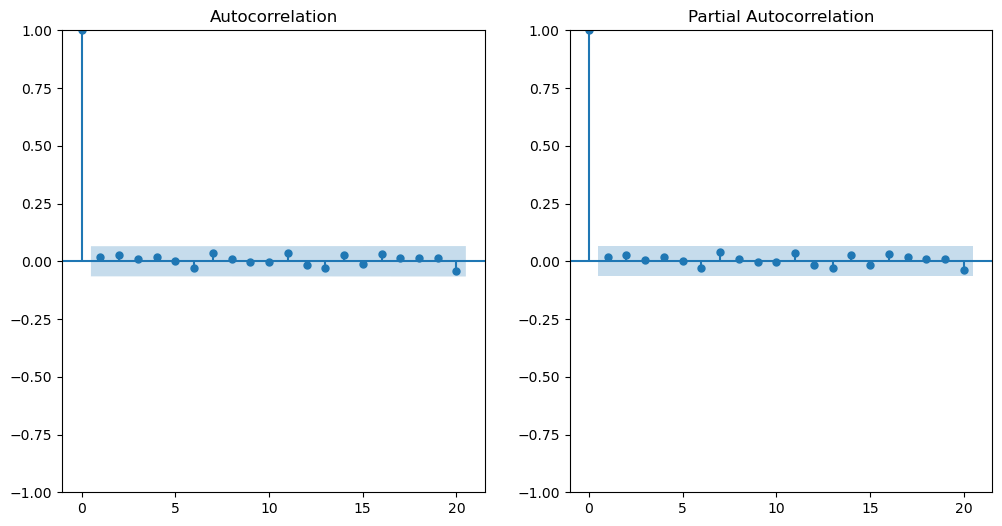

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Total Price'].dropna(), ax=plt.gca(), lags=20)
plt.subplot(122)
plot_pacf(data['Total Price'].dropna(), ax=plt.gca(), lags=20)
plt.show()

In [20]:
from pmdarima import auto_arima

# Automatically find optimal p, d, q and P, D, Q for SARIMA
stepwise_model = auto_arima(daily_data, 
                            seasonal=True, 
                            m=12,  # Monthly data (seasonality period = 12)
                            trace=True, 
                            error_action='ignore', 
                            suppress_warnings=True)

# Display the best SARIMA parameters
print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7082.709, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=7086.301, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=7086.224, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=7299.279, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=7084.484, Time=0.11 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=7084.303, Time=0.07 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=7086.302, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=7084.541, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=7084.574, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=7086.578, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.312 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:           

The PACF and ACF plots happens me to do modelling in ARIMA by helping me identify p,d,q 

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA model with seasonal components
model = SARIMAX(daily_data, 
                order=(3, 2, 1),  # Non-seasonal order
                seasonal_order=(0, 1, 2, 12),  # Seasonal order 
                enforce_stationarity=False, 
                enforce_invertibility=False)

# Fit the model
fitted_model = model.fit()

# Display the model summary
print(fitted_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                             Total Price   No. Observations:                  368
Model:             SARIMAX(3, 2, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -3280.760
Date:                                 Sat, 08 Feb 2025   AIC                           6575.520
Time:                                         11:03:03   BIC                           6602.071
Sample:                                     01-01-2023   HQIC                          6586.113
                                          - 01-03-2024                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7973      0.175     -4.569      0.000      -1.139      -0

In [22]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(fitted_model.resid, lags=[1], return_df=True)
print(ljung_box_test)

    lb_stat  lb_pvalue
1  0.126342   0.722255


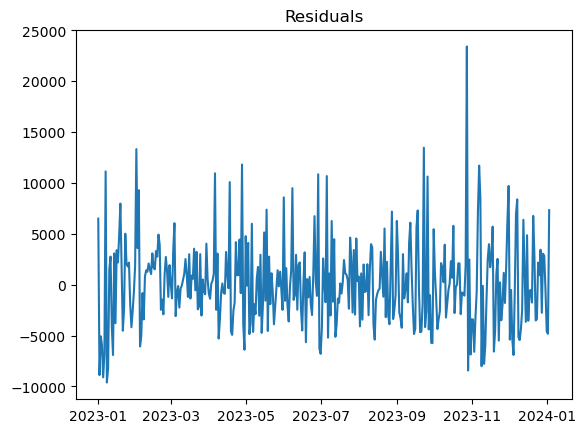

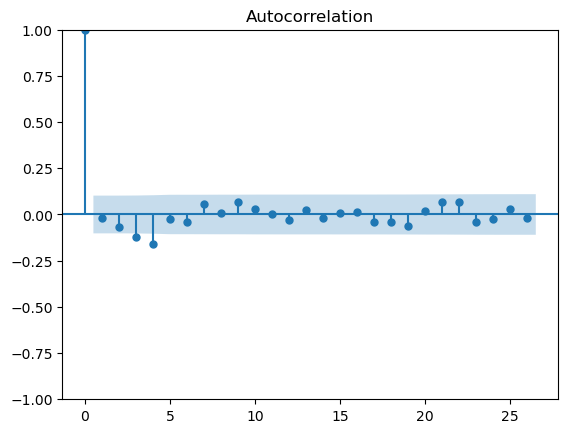

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

residuals = fitted_model.resid

plt.plot(residuals)
plt.title("Residuals")
plot_acf(residuals)
plt.show()

<Axes: title={'center': 'Histogram of Residuals'}, ylabel='Frequency'>

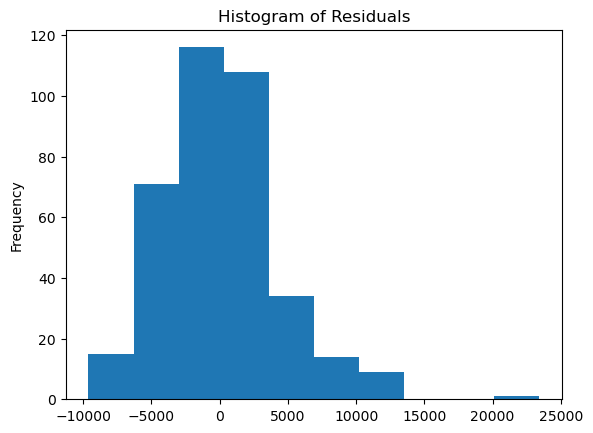

In [24]:
residuals.plot(kind='hist', bins=10, title="Histogram of Residuals")

The above histogram shows that my residuals are slightly normally distributed which means that theres might be problem from my model

In [25]:
forecast = fitted_model.forecast(steps=30)

print(forecast)


2024-01-04    2843.495120
2024-01-05    4211.943924
2024-01-06    3589.436591
2024-01-07    4944.209100
2024-01-08    4949.441205
2024-01-09    5537.563315
2024-01-10    4264.902524
2024-01-11    3335.339398
2024-01-12    3947.252462
2024-01-13    4161.257865
2024-01-14    4829.428717
2024-01-15    4350.557128
2024-01-16    3746.904783
2024-01-17    4544.638341
2024-01-18    4233.819072
2024-01-19    3970.984535
2024-01-20    5502.153890
2024-01-21    5364.367019
2024-01-22    4579.821049
2024-01-23    3394.402267
2024-01-24    4133.802815
2024-01-25    3913.592572
2024-01-26    4586.972994
2024-01-27    4778.721207
2024-01-28    3750.179058
2024-01-29    4560.608837
2024-01-30    4259.315920
2024-01-31    4092.614604
2024-02-01    5535.207624
2024-02-02    5415.547457
Freq: D, Name: predicted_mean, dtype: float64


In [26]:
forecast_steps= 30
forecast = fitted_model.forecast(steps=forecast_steps)

forecast_index = pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

forecast_series = pd.Series(forecast, index= forecast_index)

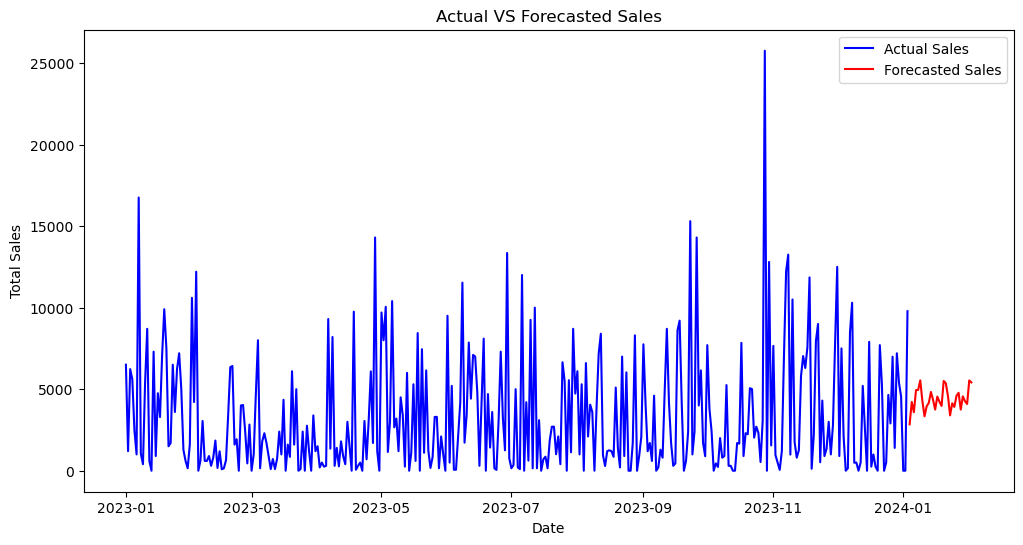

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Actual Sales', color='blue')
plt.plot(forecast_series, label= 'Forecasted Sales', color='red', linestyle='-')
plt.title('Actual VS Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

Analysis:

    ->The time series chart compares actual sales data (blue line) with forecasted sales (red line) over a period from January 2023 to early 2024. The x-axis represents time, while the y-axis indicates total sales.
        ->The forecasted sales align reasonably well with the actual sales in the latter part of the timeline.
        ->However, the model may struggle to capture extreme spikes, which can indicate the need for better handling of outliers or event-based anomalies
    ->During periods of high sales variability, the red line fails to replicate the extreme spikes observed in the actual sales. This could be because:
            ->The model is not designed to predict such abrupt changes.
            ->Spikes may be due to external factors (like promotions or events) that were not included as features in the model.

**Conclusion:**

**1.Sales Trend and Customer Behavior Insights:**

        i.Sales Variability:
            ->These peaks may indicate periods of increased customer demand, possibly influenced by promotions, holidays, or other seasonal factors.
            ->The forecasting model (red line) captures the general trend but smooths out extreme variations, suggesting a stable but less sensitive prediction for future planning.

        ii.Customer Purchasing Patterns:
            ->The variability in the actual sales reflects dynamic customer behavior like there's:
                i.Certain times of the year see heightened purchasing activity in which the lack of consistent growth or decline in the sales trend suggests that customer demand may be influenced more by external events or product-specific factors than by overall market trends.


**2.Forecasting and Business Impact:**

         i.Forecasting Accuracy:
             -->The red line indicates that the model is effective for general forecasting, providing a baseline for sales expectations. However, it's inability to predict extreme spikes suggests that incorporating external variables like marketing campaigns or holidays could enhance accuracy.
            
        ii.Future Planning:
          ->The model’s predictions (red line) offer insights into expected sales trends for early 2024. Businesses can use this   information to:
            -->Plan on how the business doing to avoid understocking or overstocking.
            -->Schedule staff and resources based on anticipated demand.
